In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm


In [30]:
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def loss(x):
    return himmelblau(x[0], x[1])

In [31]:
# hyperparameters
episodes = 20
gens = 20

# scale [0,1] to [0,4], then shift it left so that it's [-2,2]
# x corresponds to an array of network parameters
x = np.random.rand(2) * 4 - 2


plot_xs = np.array([x])

# initial parent x
x_p = x
best_loss = loss(x_p)
current_xs = [0] * gens
for e in range(episodes-1):
    N = np.random.normal(scale=0.5, size=(gens, 2))
    offspring_losses = np.zeros((gens, len(x)))
    for i in range(gens-1):
        x = x_p + N[i, :]
        x_loss = loss(x)
        # now that we're using this gradient technique, we won't actually use the most fit x other than
        # for gauging performance
        if x_loss < best_loss:
            best_loss = x_loss
            curr_best_x = x
        current_xs[i] = x
        offspring_losses[i] = x_loss

    # mean of offspring Xs' performance
    mu_loss = np.mean(offspring_losses)
    std_loss = np.std(offspring_losses)
    # normalize losses
    A = mu_loss
    if std_loss != 0:
        A = (offspring_losses - mu_loss) / std_loss
    
    # weight losses by distance from parent,
    # grad = (A * N) / gens
    grad = np.mean(A * N, axis=-2)
    print('grad', grad)


    # x_p = curr_best_x
    # numpy is weird and this is the way I found to append an array at the end of some other array
    plot_xs = np.stack((*plot_xs, x_p))
    # grad points up so we want the inverse of it
    x_p = x - grad

print(plot_xs)

grad [-0.0577118  -0.19246855]
grad [-0.3637192 -0.0454291]
grad [-0.28702156 -0.25888134]
grad [-0.41184244 -0.20261863]
grad [-0.18929496 -0.17835922]
grad [-0.39222617 -0.22948476]
grad [0.29213454 0.26353249]
grad [0.30725974 0.17687729]
grad [ 0.45486934 -0.08704984]
grad [-0.21912548 -0.09034667]
grad [-0.3288717 -0.0125368]
grad [-0.07763406 -0.37976627]
grad [-0.43461283  0.0744708 ]
grad [-0.08043683  0.47126085]
grad [-0.24173313 -0.03622064]
grad [-0.25689896 -0.1695751 ]
grad [-0.13447645 -0.20624979]
grad [-0.28125336 -0.01257035]
grad [-0.11577945 -0.10743139]
[[ 1.76066116e-01 -6.45813843e-01]
 [ 1.76066116e-01 -6.45813843e-01]
 [ 9.21578139e-01 -6.05529421e-01]
 [ 8.49283911e-01 -5.80040394e-01]
 [ 1.53063262e+00  3.60736855e-01]
 [ 2.16426556e+00  1.61778804e-03]
 [ 2.77500838e+00  8.96467786e-01]
 [ 3.38226751e+00  1.90203926e+00]
 [ 3.85668745e+00  2.21887245e+00]
 [ 3.25933803e+00  1.33449182e+00]
 [ 2.88403801e+00  1.82296719e+00]
 [ 2.49757653e+00  2.07264684e+00]

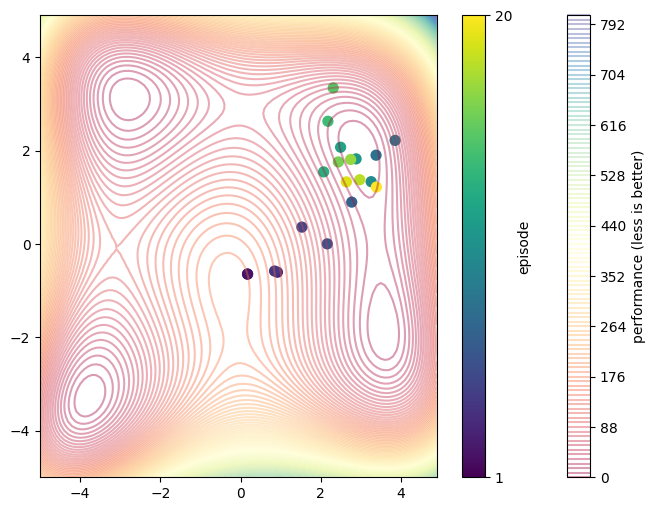

In [32]:

fig = plt.figure(figsize=(8, 6))
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = himmelblau(X, Y)
cs = plt.contour(X, Y, Z, levels=100, cmap='Spectral',
                 norm=colors.Normalize(vmin=Z.min(), vmax=Z.max()), alpha=0.4)
cba = fig.colorbar(cs)
cba.set_label('performance (less is better)')

plot_z = np.linspace(0, 1, plot_xs.shape[0])
xs = plt.scatter(plot_xs[:, 0], plot_xs[:, 1], s=50, c=plot_z, cmap=cm.viridis)
cbb = fig.colorbar(xs)
cbb.set_label('episode')
cbb.set_ticks([0, 1])
cbb.set_ticklabels([1, len(plot_xs)])
plt.show()